In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
5/3/20          739    7090        703         15          490      1055   
5/4/20          742    7197        730         15          555      1178   
5/5/20          755    7523        763         16          587      1270   
5/6/20          761    7731        798         16          633      1461   
5/7/20          765    7868        832         16          695      1685   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
5/3/20                 7954      469                  116  1649  
5/4/20                 8235      471                  116  1668  
5/5/20                 8480      473                  116  1685  
5/6/20                 8807      478                  116  1703  
5/7/20                 9095      488                  116  1729  

[69 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

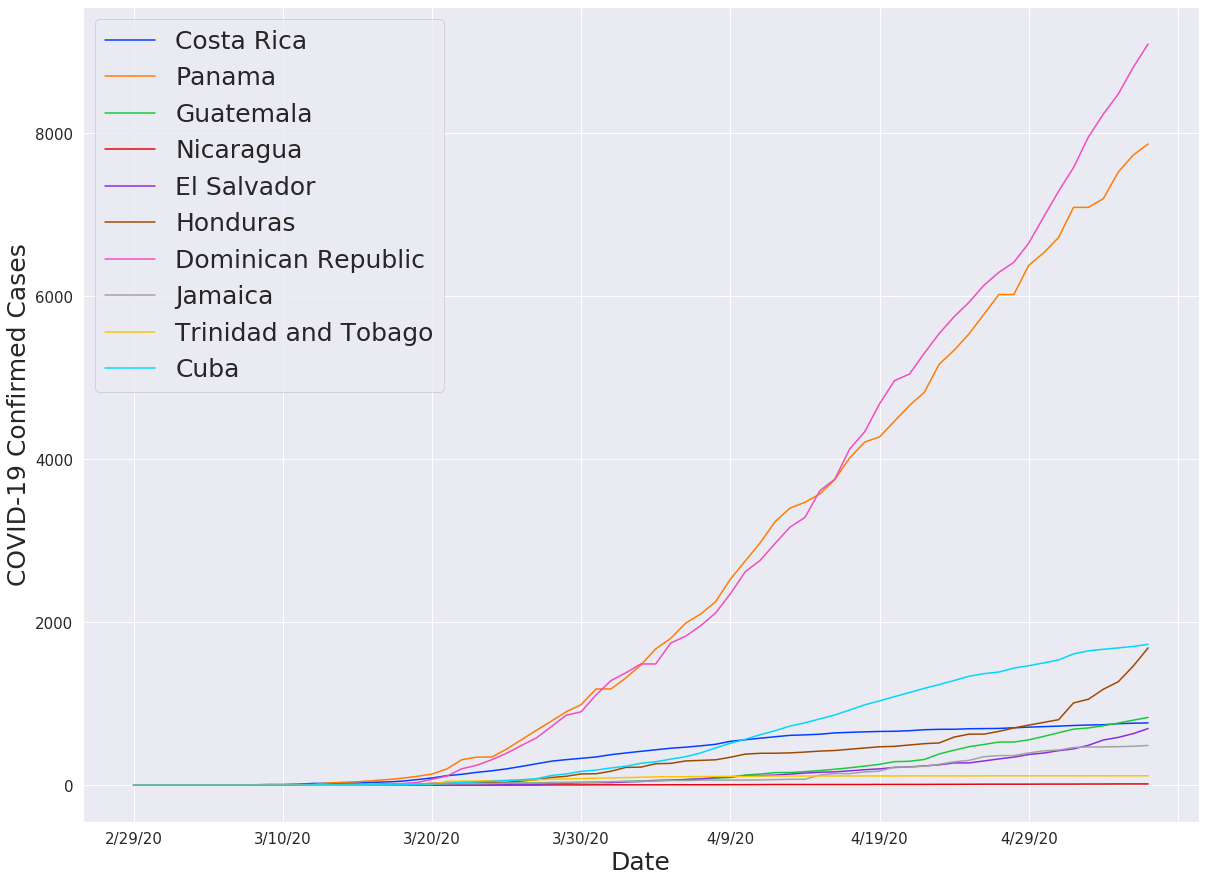

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

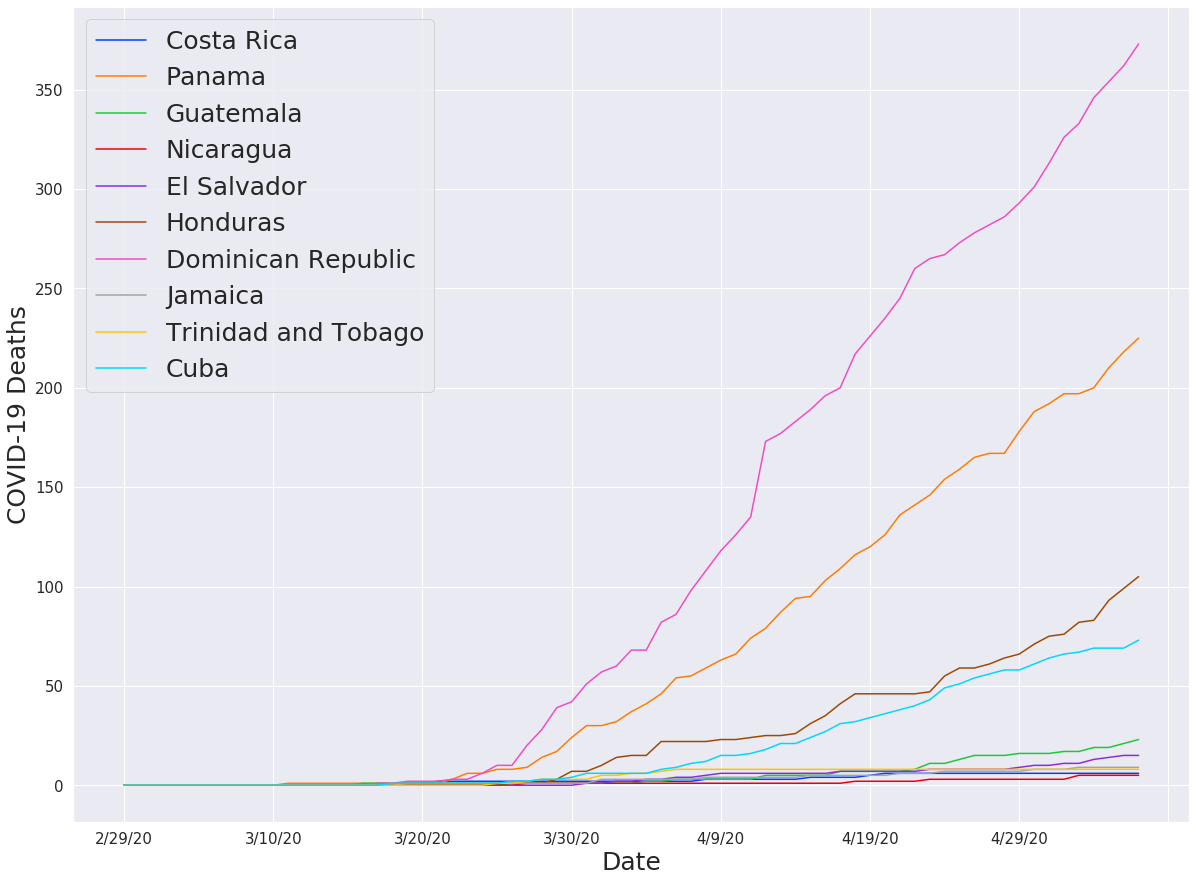

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20         0.0     0.0        0.0        0.0          0.0       0.0   
...            ...     ...        ...        ...          ...       ...   
5/3/20         6.0     0.0       15.0        1.0         44.0      45.0   
5/4/20         3.0   107.0       27.0        0.0         65.0     123.0   
5/5/20        13.0   326.0       33.0        1.0         32.0      92.0   
5/6/20         6.0   208.0       35.0        0.0         46.0     191.0   
5/7/20         4.0   137.0       34.0        0.0         62.0     224.0   

        Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                 1.0      0.0                  0.0   0.0  
3/2/20                 0.0      0.0                  0.0   0.0  
3/3/20                 0.0      0.0                  0.0   0.0  
3/4/20                 0.0      0.0                  0.0   0.0  
3/5/20                 0.0      0.0                  0.0   0.0  
...                    ...      ...                  ...   ...  
5/3/20               376.0      6.0                  0.0  38.0  
5/4/20               281.0      2.0                  0.0  19.0  
5/5/20               245.0      2.0                  0.0  17.0  
5/6/20               327.0      5.0                  0.0  18.0  
5/7/20               288.0     10.0                  0.0  26.0  

[68 rows x 10 columns]

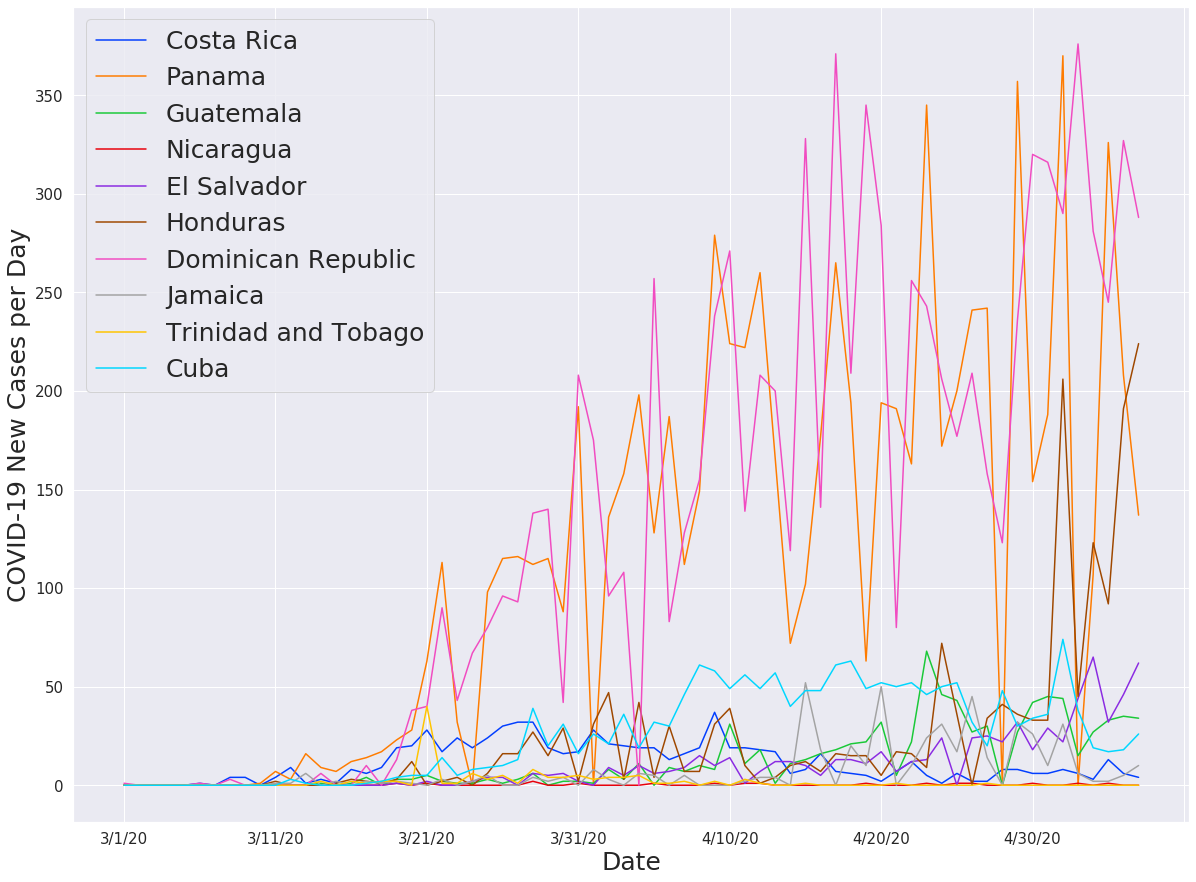

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

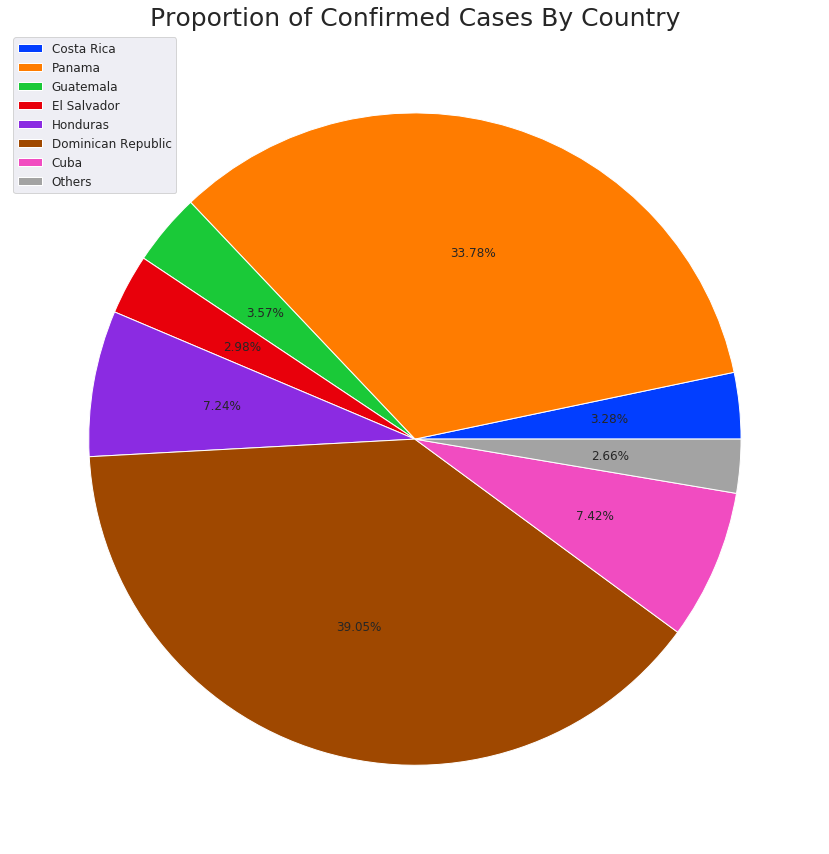

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

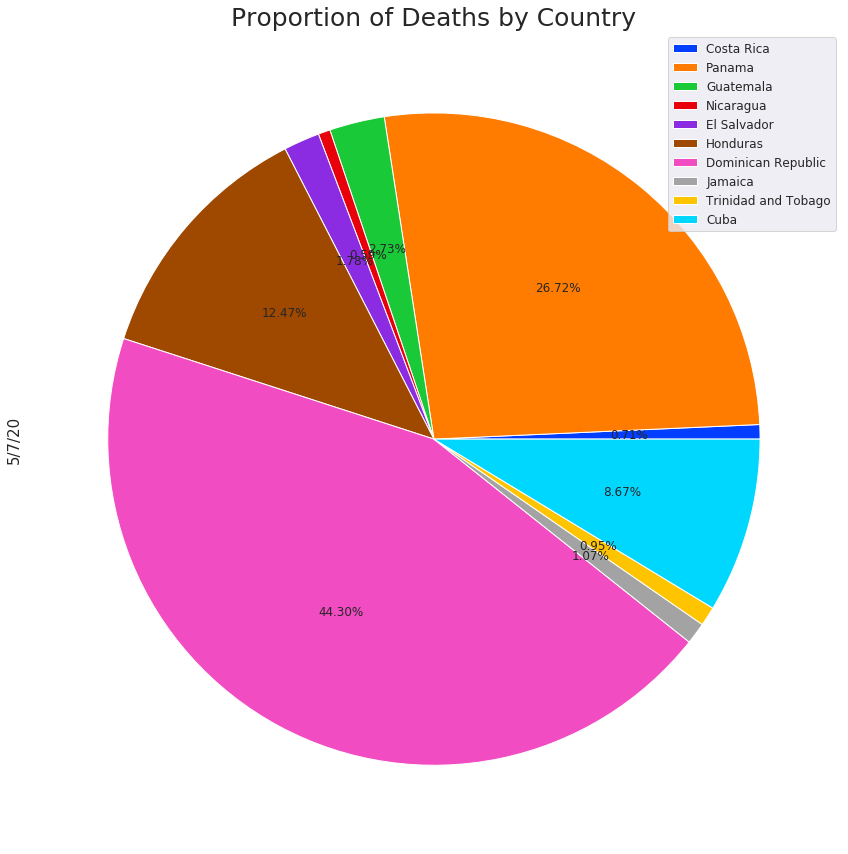

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000   0.000000     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
5/3/20     1.008186  1.000000   1.021802   1.071429     1.098655  1.044554   
5/4/20     1.004060  1.015092   1.038407   1.000000     1.132653  1.116588   
5/5/20     1.017520  1.045297   1.045205   1.066667     1.057658  1.078098   
5/6/20     1.007947  1.027649   1.045872   1.000000     1.078365  1.150394   
5/7/20     1.005256  1.017721   1.042607   1.000000     1.097946  1.153320   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000                  0.0  0.000000  
3/1/20             0.000000  0.000000                  0.0  0.000000  
3/2/20             1.000000  0.000000                  0.0  0.000000  
3/3/20             1.000000  0.000000                  0.0  0.000000  
3/4/20             1.000000  0.000000                  0.0  0.000000  
...                     ...       ...                  ...       ...  
5/3/20             1.049617  1.012959                  1.0  1.023588  
5/4/20             1.035328  1.004264                  1.0  1.011522  
5/5/20             1.029751  1.004246                  1.0  1.010192  
5/6/20             1.038561  1.010571                  1.0  1.010682  
5/7/20             1.032701  1.020921                  1.0  1.015267  

[69 rows x 10 columns]

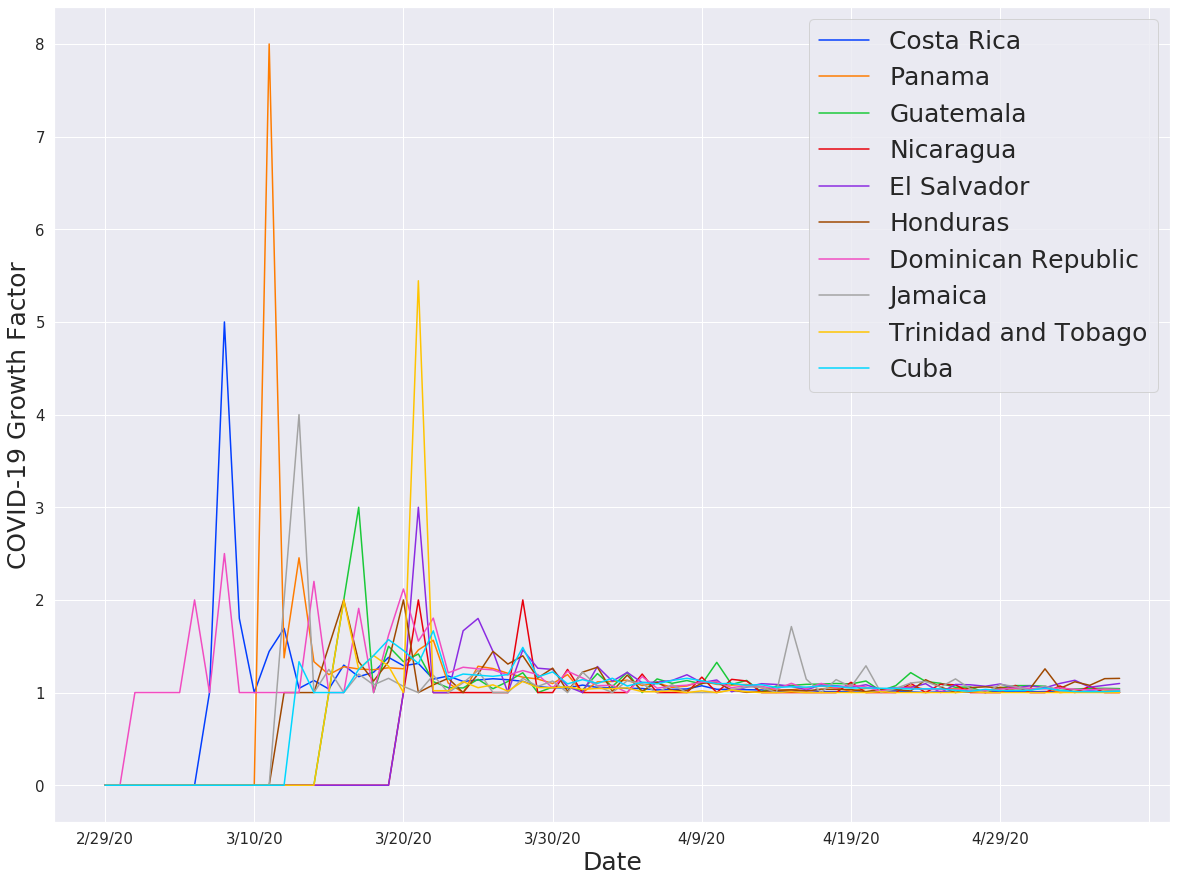

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica     Panama  Guatemala  Nicaragua  El Salvador   Honduras  \
count   69.000000  69.000000  69.000000  69.000000    69.000000  69.000000   
mean     1.040369   1.059587   0.904243   0.760651     0.829152   0.941468   
std      0.605144   0.966189   0.548596   0.518290     0.594282   0.473423   
min      0.000000   0.000000   0.000000   0.000000     0.000000   0.000000   
25%      1.007947   1.017721   1.000000   0.000000     0.000000   1.000000   
50%      1.028634   1.055060   1.058824   1.000000     1.057895   1.035639   
75%      1.120253   1.146310   1.117647   1.000000     1.098655   1.150394   
max      5.000000   8.000000   3.000000   2.000000     3.000000   2.000000   

       Dominican Republic    Jamaica  Trinidad and Tobago       Cuba  
count           69.000000  69.000000            69.000000  69.000000  
mean             1.141780   0.949908             0.887963   0.915775  
std              0.370344   0.580485             0.719980   0.463646  
min              0.000000   0.000000             0.000000   0.000000  
25%              1.019546   1.000000             1.000000   1.010682  
50%              1.048894   1.031746             1.000000   1.050242  
75%              1.157800   1.105263             1.020408   1.139785  
max              2.500000   4.000000             5.444444   1.666667

In [17]:
growth_df.mean()

Costa Rica             1.040369
Panama                 1.059587
Guatemala              0.904243
Nicaragua              0.760651
El Salvador            0.829152
Honduras               0.941468
Dominican Republic     1.141780
Jamaica                0.949908
Trinidad and Tobago    0.887963
Cuba                   0.915775
dtype: float64

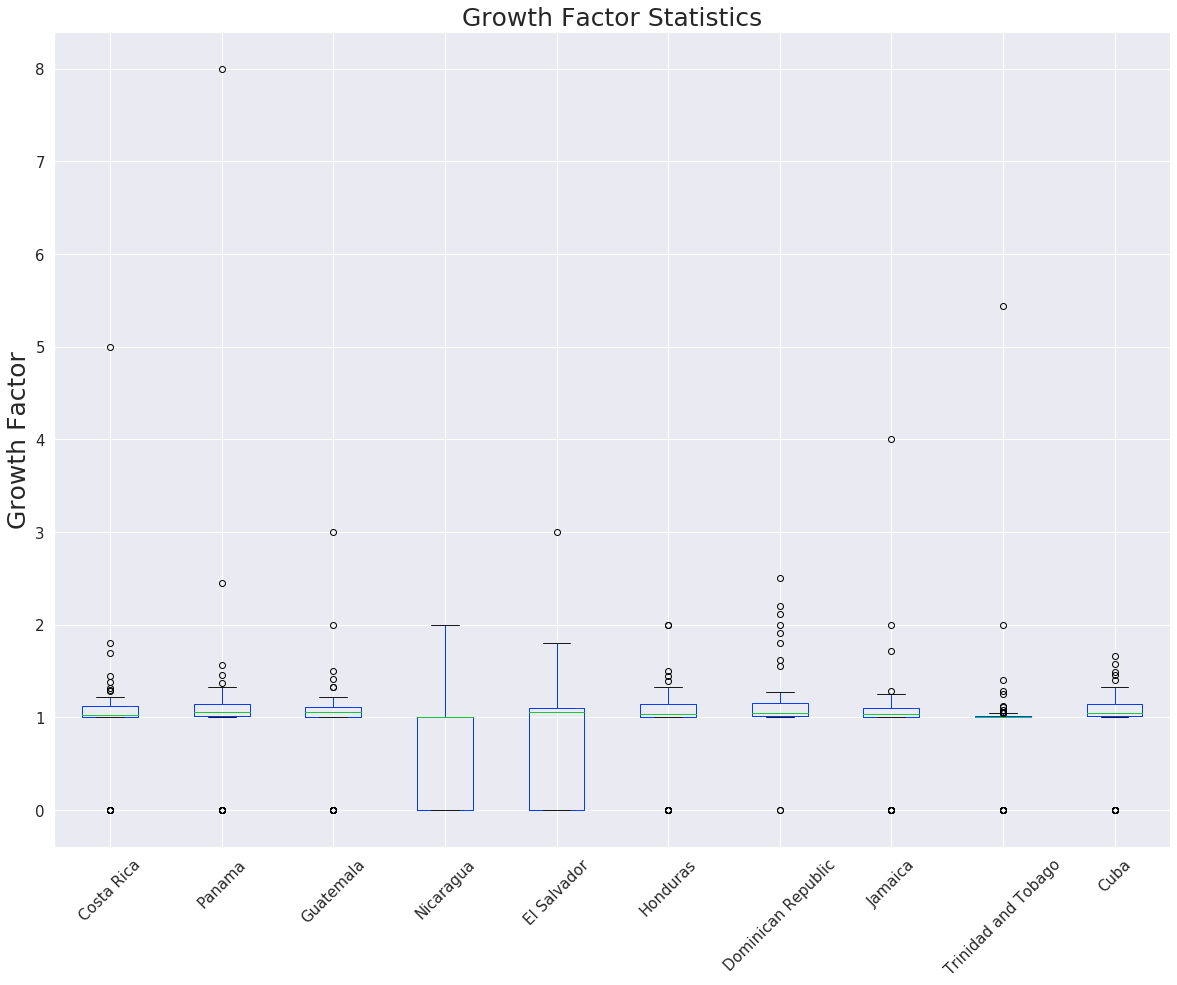

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

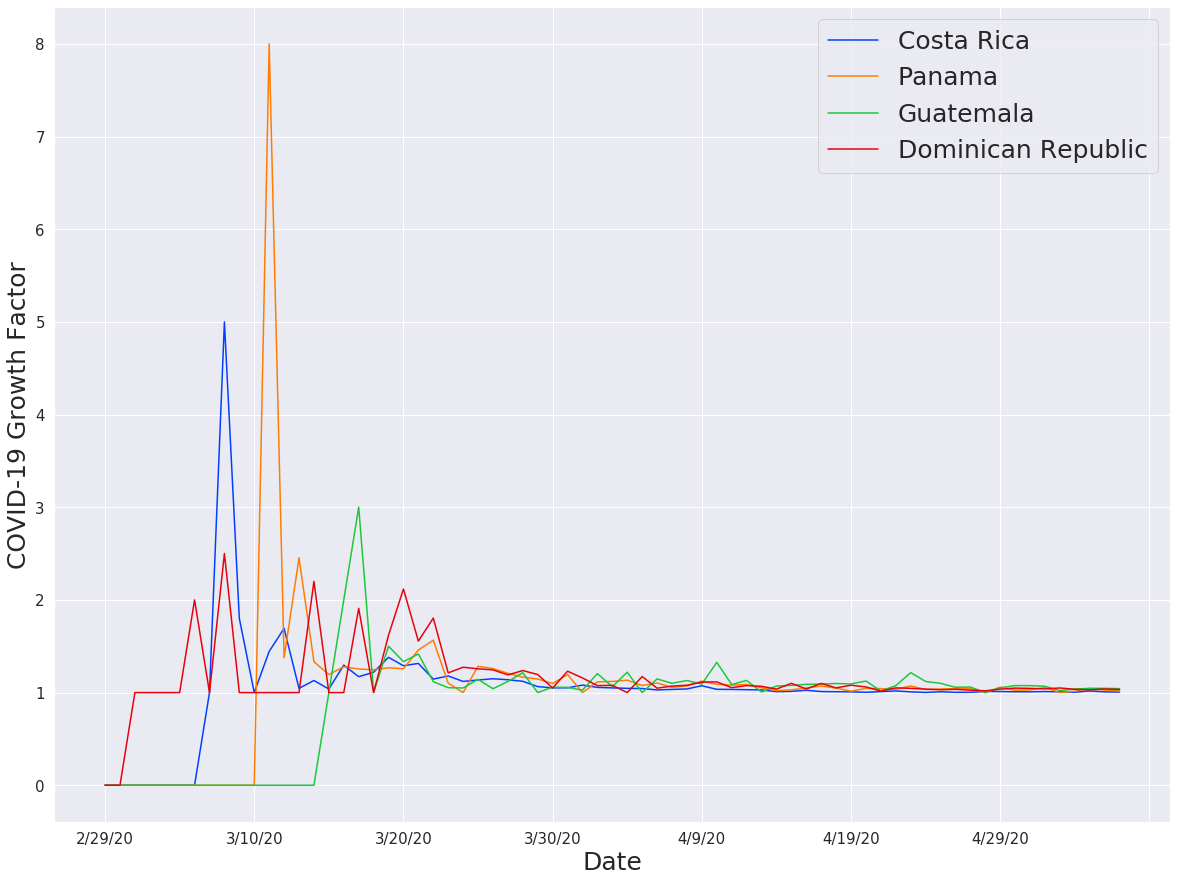

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica     Panama  Guatemala  Nicaragua  El Salvador   Honduras  \
count   62.000000  58.000000  54.000000  49.000000    49.000000  57.000000   
mean     1.157830   1.260544   1.155422   1.071120     1.167581   1.139672   
std      0.519608   0.925157   0.300733   0.202664     0.311366   0.205515   
min      1.000000   1.000000   1.000000   1.000000     1.000000   1.000000   
25%      1.009385   1.038569   1.046904   1.000000     1.054852   1.022951   
50%      1.034756   1.074036   1.076624   1.000000     1.084577   1.054226   
75%      1.128244   1.194367   1.128531   1.071429     1.130435   1.157895   
max      5.000000   8.000000   3.000000   2.000000     3.000000   2.000000   

       Dominican Republic    Jamaica  Trinidad and Tobago       Cuba  
count           67.000000  57.000000            54.000000  56.000000  
mean             1.175863   1.149889             1.134619   1.128366  
std              0.317218   0.418457             0.616391   0.146754  
min              1.000000   1.000000             1.000000   1.000000  
25%              1.027752   1.000000             1.000000   1.037655  
50%              1.049617   1.061538             1.008734   1.074899  
75%              1.165257   1.127660             1.043972   1.157897  
max              2.500000   4.000000             5.444444   1.666667

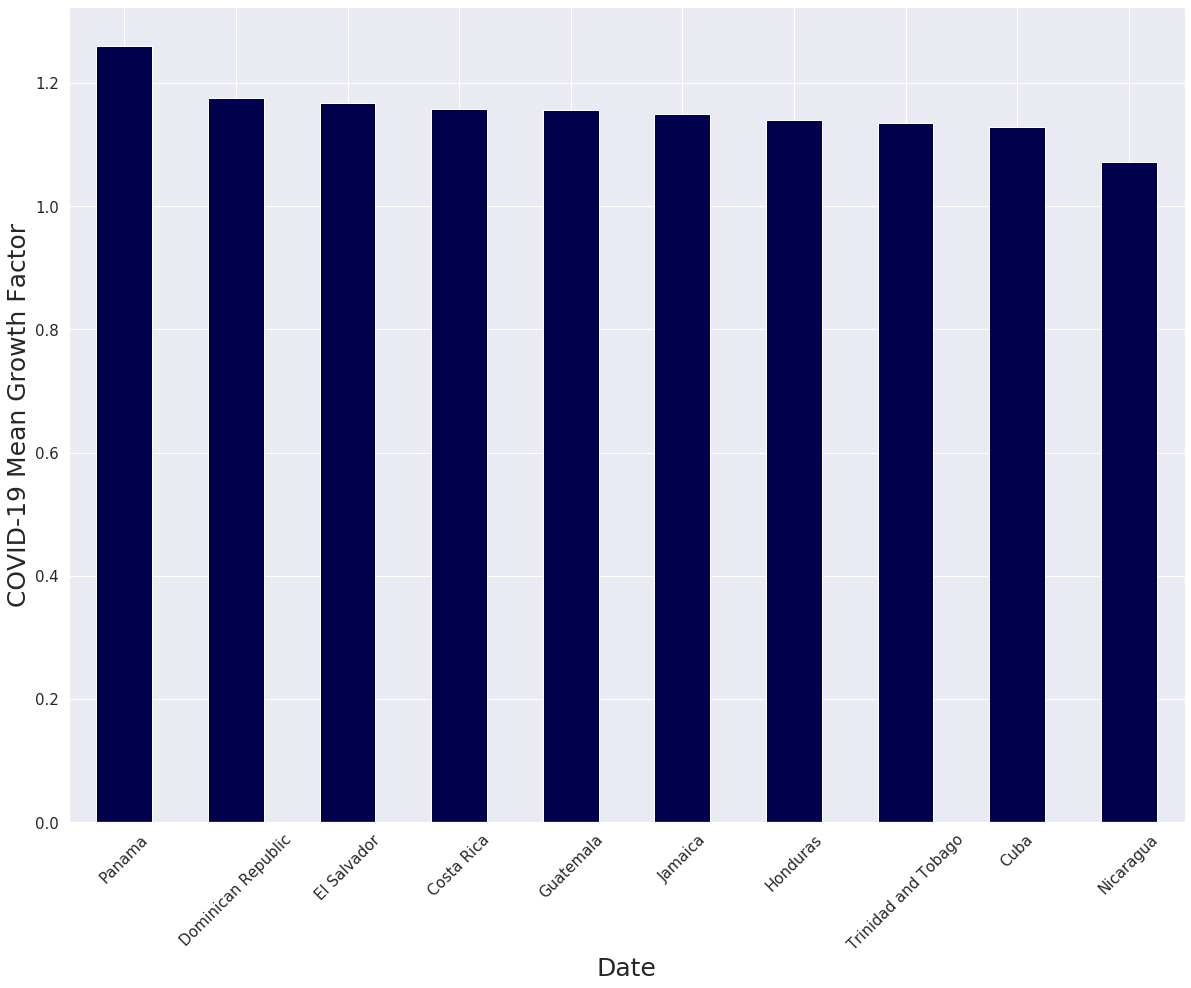

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

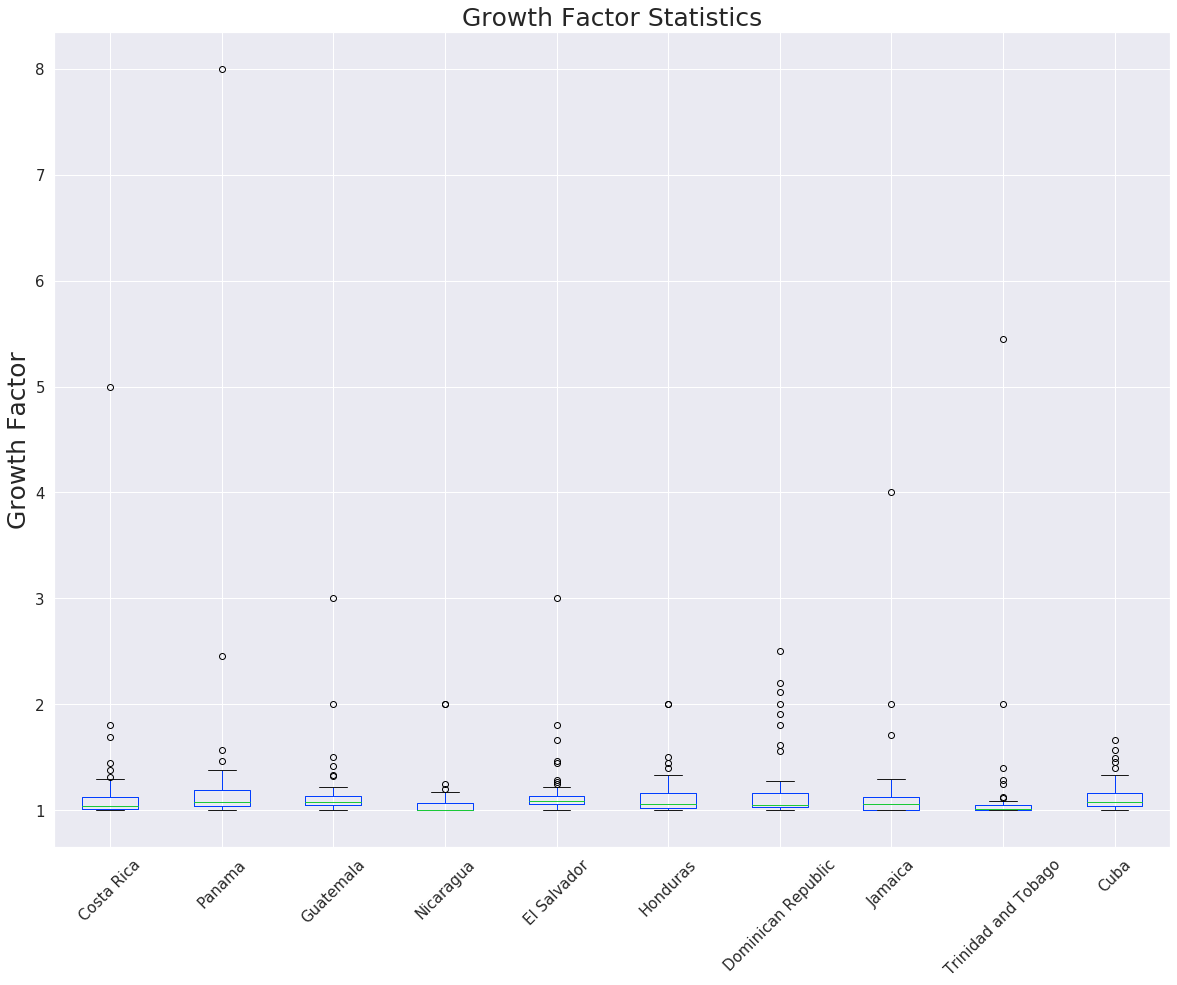

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

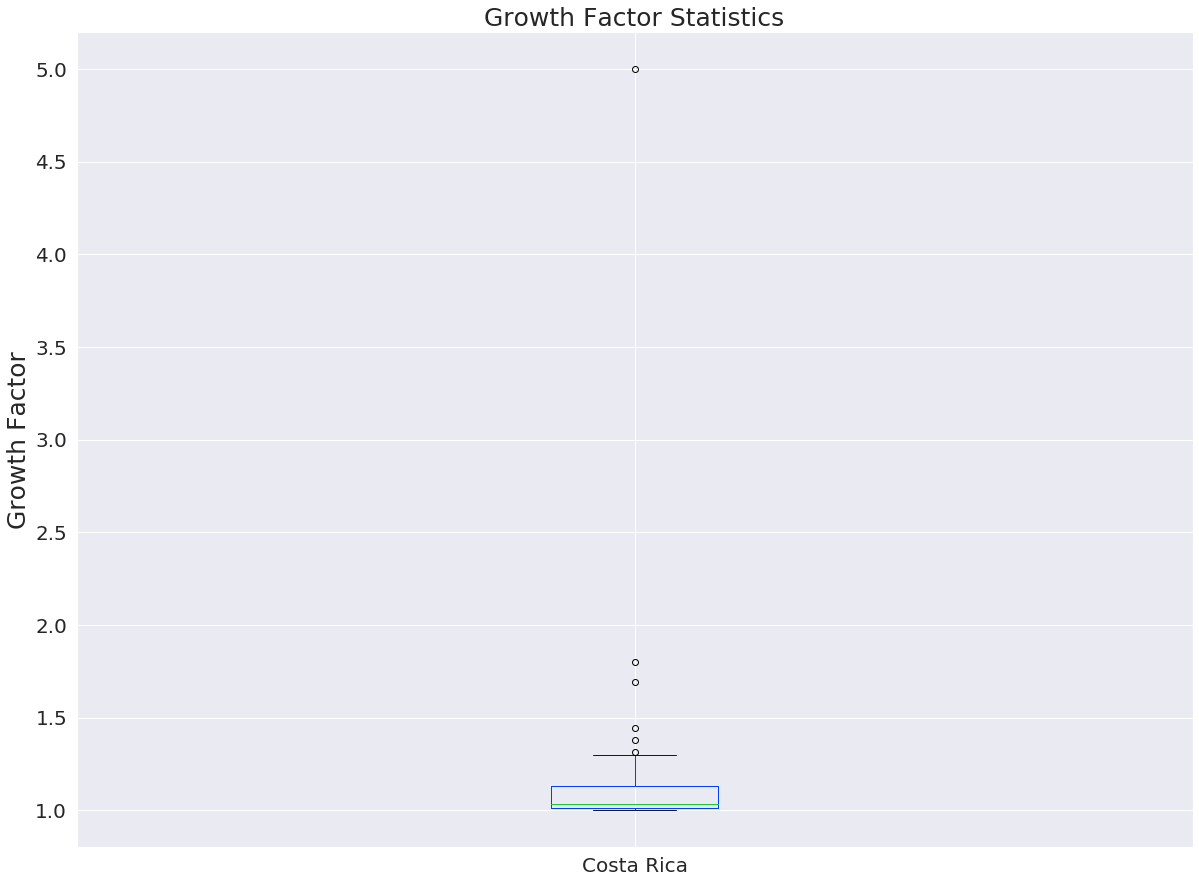

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()